In [49]:
import sys
import os
# Adiciona o diretório raiz do projeto ao sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from config import settings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [50]:
df_reels = pd.read_excel(settings.ALL_XLSX, sheet_name="reels")

cols = ['PC1_Engajamento_videoPlay', 'PC2_videoDuration',
       'Clusters (AutoClusterHPO)', 'model', 'config', 'score', 'algo_name']

df_reels = df_reels.drop(cols, axis=1, errors='ignore')

df_reels = df_reels[(np.abs(stats.zscore(df_reels[['videoPlayCount', 'likesCount']])) < 3.0).all(axis=1)]

df_reels.columns

Index(['inputUrl', 'id', 'type', 'shortCode', 'caption', 'hashtags',
       'mentions', 'url', 'commentsCount', 'firstComment', 'latestComments',
       'dimensionsHeight', 'dimensionsWidth', 'displayUrl', 'images',
       'videoUrl', 'alt', 'likesCount', 'videoViewCount', 'videoPlayCount',
       'timestamp', 'childPosts', 'ownerFullName', 'ownerUsername', 'ownerId',
       'productType', 'videoDuration', 'isSponsored', 'musicInfo',
       'isCommentsDisabled', 'taggedUsers', 'coauthorProducers',
       'locationName', 'locationId', 'isPinned', 'data_hora', 'Width X Height',
       'Total de Engajamento', 'Tipo'],
      dtype='object')

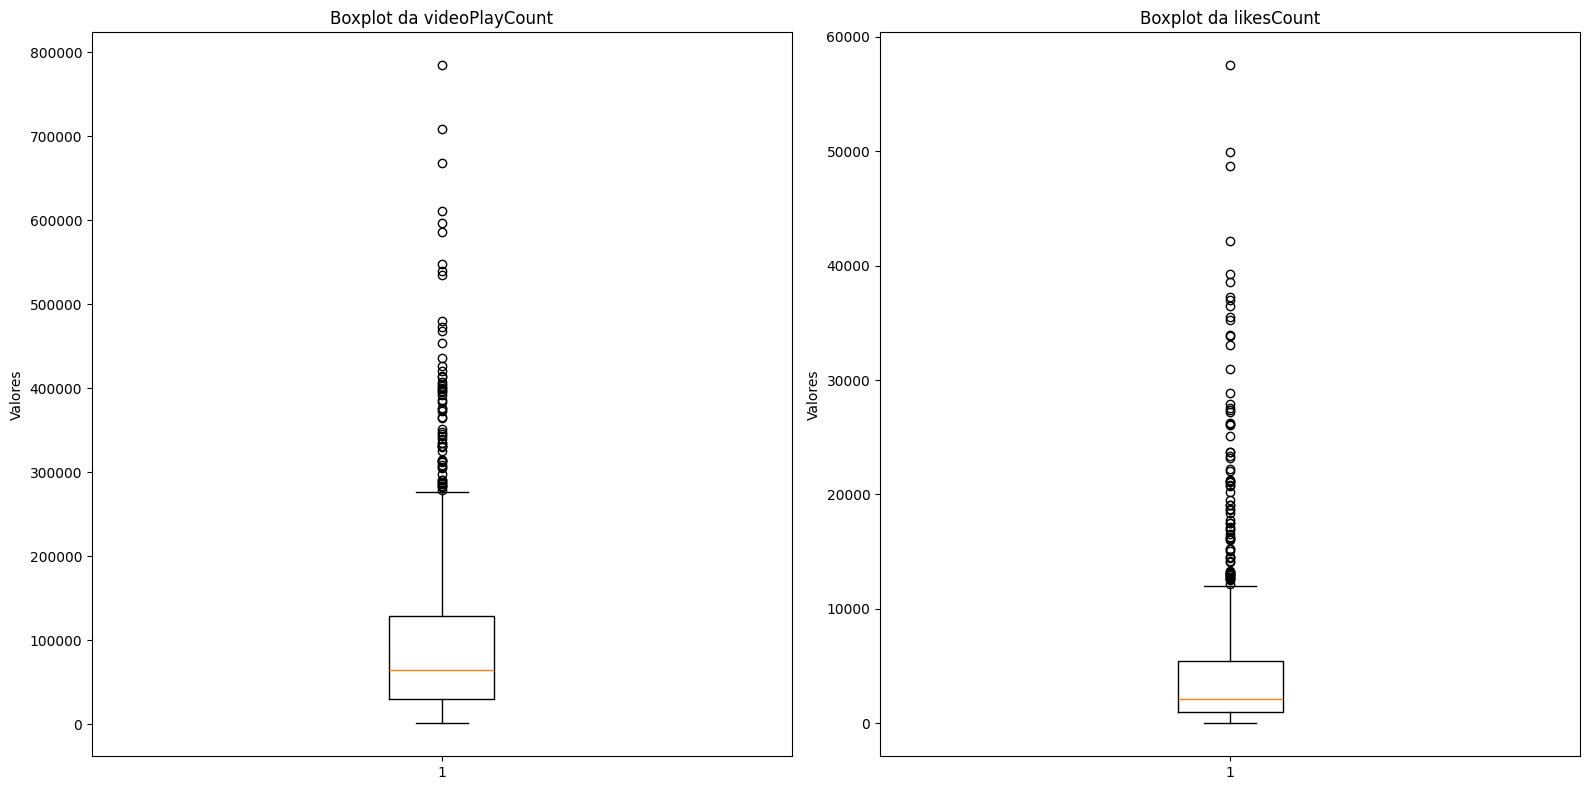

In [51]:
def plotarFigura1():

    df = df_reels[['videoPlayCount', 'likesCount']]

    # 2. Criar a figura e os eixos (subplots)
    # A estrutura da grade continua a mesma: 2 linhas e 4 colunas.
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

    # 3. "Achatando" o array de eixos para facilitar a iteração
    axes = axes.flatten()

    # 4. Iterar pelas colunas do DataFrame e plotar cada uma em um eixo
    # Usamos enumerate(df.columns) para obter tanto o índice (i) quanto o nome da coluna.
    for i, col_name in enumerate(df.columns):
        # Selecionamos o eixo atual (axes[i])
        ax = axes[i]
        
        # Criamos o boxplot usando os dados da coluna atual (df[col_name])
        ax.boxplot(df[col_name])
        
        # Usamos o nome da coluna como título do subplot
        ax.set_title(f'Boxplot da {col_name}')
        ax.set_ylabel('Valores')

    # 5. Ajustar o layout para evitar sobreposição
    plt.tight_layout()

    # 6. Salvar e exibir o gráfico
    plt.savefig('boxplot_do_dataframe.png')

    # Mostra a figura gerada
    plt.show()

plotarFigura1()

In [52]:
X = df_reels[['videoPlayCount']]  # X precisa ser um DataFrame (2D)
Y = df_reels['likesCount']            # Y pode ser uma Series (1D)

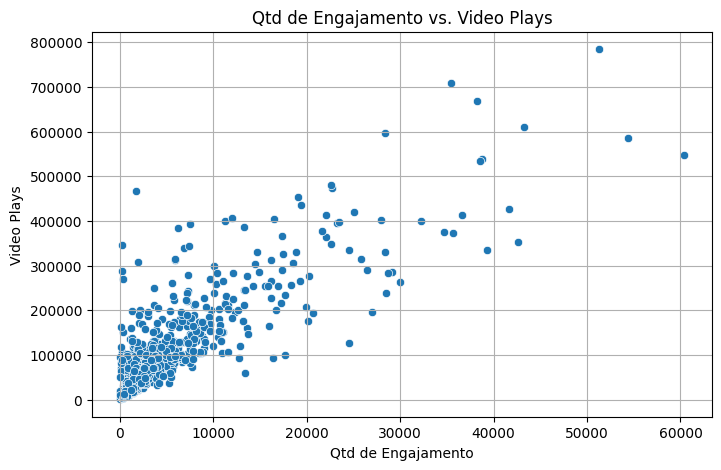

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Total de Engajamento', y='videoPlayCount', data=df_reels)
plt.title('Qtd de Engajamento vs. Video Plays')
plt.xlabel('Qtd de Engajamento')
plt.ylabel('Video Plays')
plt.grid(True)
plt.show()

In [54]:
# test_size=0.2 significa que 20% dos dados serão para teste
# random_state=42 garante que a divisão seja a mesma em todas as execuções
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 630 amostras
Tamanho do conjunto de teste: 158 amostras


In [55]:
# Criando o modelo
modelo_regressao = LinearRegression()

# Treinando o modelo com os dados de treino
modelo_regressao.fit(X_train, y_train)

print("Modelo treinado com sucesso!")
# O modelo aprendeu a equação da reta: y = b0 + b1*x
# Onde b1 é o coeficiente e b0 é o intercepto
print(f"Coeficiente (b1): {modelo_regressao.coef_[0]:.2f}")
print(f"Intercepto (b0): {modelo_regressao.intercept_:.2f}")

Modelo treinado com sucesso!
Coeficiente (b1): 0.05
Intercepto (b0): -585.88


In [56]:
# Realizando previsões nos dados de teste
y_pred = modelo_regressao.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("\nMétricas de Avaliação:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Métricas de Avaliação:
Mean Absolute Error (MAE): 1812.94
Mean Squared Error (MSE): 12125768.19
Root Mean Squared Error (RMSE): 3482.21
R-squared (R²): 0.76


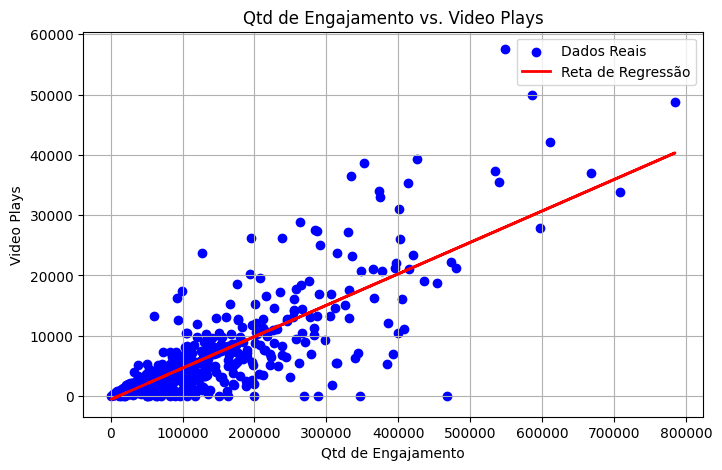

In [57]:
plt.figure(figsize=(8, 5))
# Gráfico de dispersão dos dados originais
plt.scatter(X, Y, color='blue', label='Dados Reais')
# Linha de regressão prevista pelo modelo
plt.plot(X, modelo_regressao.predict(X), color='red', linewidth=2, label='Reta de Regressão')
plt.title('Qtd de Engajamento vs. Video Plays')
plt.xlabel('Qtd de Engajamento')
plt.ylabel('Video Plays')
plt.legend()
plt.grid(True)
plt.show()

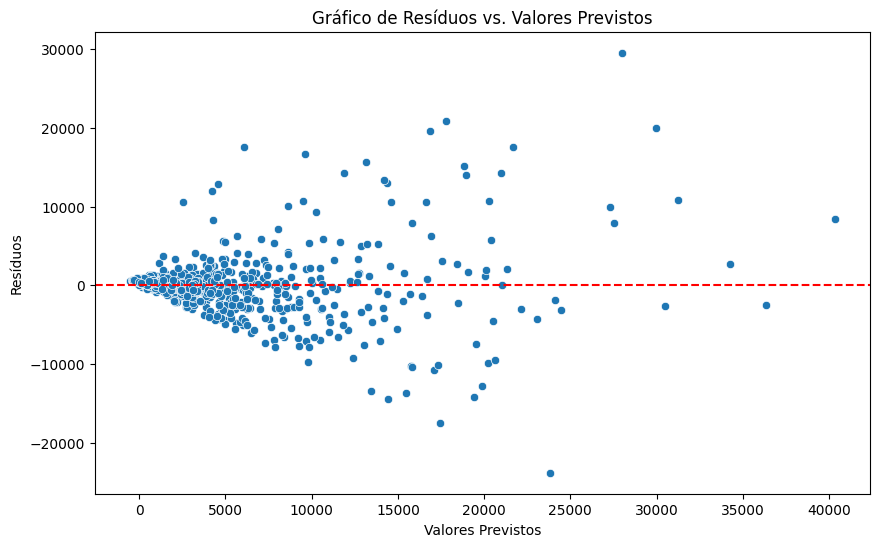

In [59]:
previsoes = modelo_regressao.predict(X)

residuos = Y - previsoes

plt.figure(figsize=(10, 6))
sns.scatterplot(x=previsoes, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

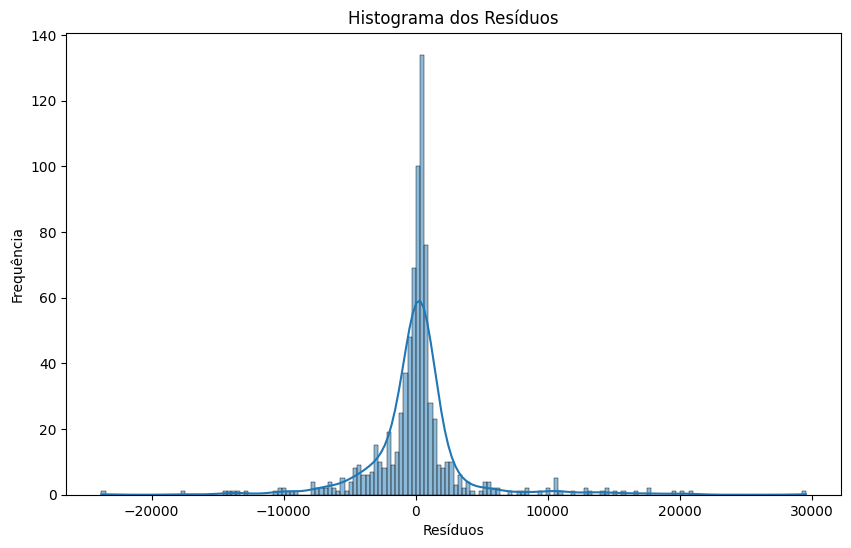

In [60]:
# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

In [30]:
# Teste de Shapiro-Wilk
shapiro_test, shapiro_p_valor = stats.shapiro(residuos)
print(f"Teste de Shapiro-Wilk: Estatística={shapiro_test:.3f}, p-valor={shapiro_p_valor:.3f}")

if shapiro_p_valor > 0.05:
    print("Conclusão: Os resíduos parecem ser normalmente distribuídos (p > 0.05).")
else:
    print("Conclusão: Os resíduos NÃO parecem ser normalmente distribuídos (p <= 0.05).")

Teste de Shapiro-Wilk: Estatística=0.552, p-valor=0.000
Conclusão: Os resíduos NÃO parecem ser normalmente distribuídos (p <= 0.05).


In [61]:
def calcular_durbin_watson(residuos: np.ndarray) -> float:
    """
    Calcula a estatística de Durbin-Watson manualmente usando NumPy.

    Args:
        residuos (np.ndarray): Um array NumPy contendo os resíduos do modelo.

    Returns:
        float: O valor da estatística de Durbin-Watson.
    """
    # Numerador da fórmula: Soma das diferenças ao quadrado entre resíduos consecutivos.
    # np.diff(residuos) calcula (e_t - e_{t-1}) para todo o array.
    numerador = np.sum(np.diff(residuos) ** 2)
    
    # Denominador da fórmula: Soma dos resíduos ao quadrado.
    denominador = np.sum(residuos ** 2)
    
    return numerador / denominador

In [62]:
dw_manual = calcular_durbin_watson(residuos.to_numpy()) # Convertendo para array NumPy
print(f"Resultado com a função manual (NumPy): {dw_manual:.4f}")

if 1.5 < dw_manual < 2.5:
    print("Conclusão: Provavelmente não há autocorrelação nos resíduos.")
else:
    print("Conclusão: Atenção, pode haver autocorrelação nos resíduos.")

Resultado com a função manual (NumPy): 1.7242
Conclusão: Provavelmente não há autocorrelação nos resíduos.
